In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-2000,0:3]
    ytrain =np.asarray(Y[0:-2000])
    xtest = X[-2000:,0:3]
    ytest = np.asarray(Y[-2000:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=10,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(2345, 3, 1)
Tensor("input_1:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 2345 samples, validate on 2000 samples
Epoch 1/10
2345/2345 [==============================] - 13s 6ms/step - loss: 180.5616 - val_loss: 112.8637
Epoch 2/10
2345/2345 [==============================] - 11s 5ms/step - loss: 77.5484 - val_loss: 167.6479
Epoch 3/10
2345/2345 [==============================] - 11s 4ms/step - loss: 44.0472 - val_loss: 76.4831
Epoch 4/10
2345/2345 [==============================] - 13s 5ms/step - loss: 13.4044 - val_loss: 33.5510
Epoch 5/10
2345/2345 [==============================] - 11s 5ms/step - loss: 4.1538 - val_loss: 19.6220
Epoch 6/10
2345/2345 [==============================] - 10s 4ms/step - loss: 1.6931 - val_loss: 14.1732
Epoch 7/10
2345/2345 [==============================] - 10s 4ms/step - loss: 1.0726 - val_loss: 11.8013
Epoch 8/10
2345/2345 [==============================] - 10s 4ms/step - loss: 0.8872 - val_loss: 10.1270
Epoch 9/10
2345/2345 [==============================] - 11s 5ms/step - loss: 0.7394 - val_loss: 9.1155
Epoch 10/1

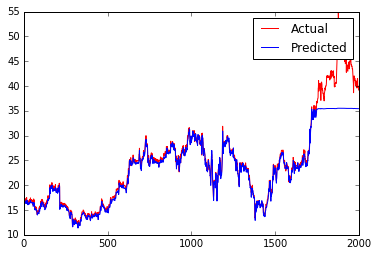

In [3]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-3396,0:3]
    ytrain =np.asarray(Y[0:-3396])
    xtest = X[-3396:,0:3]
    ytest = np.asarray(Y[-3396:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [5]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=10,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(949, 3, 1)
Tensor("input_2:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 949 samples, validate on 3396 samples
Epoch 1/10
949/949 [==============================] - 10s 11ms/step - loss: 59.1791 - val_loss: 468.1751
Epoch 2/10
949/949 [==============================] - 7s 7ms/step - loss: 18.9786 - val_loss: 205.0290
Epoch 3/10
949/949 [==============================] - 7s 7ms/step - loss: 8.5032 - val_loss: 303.7714
Epoch 4/10
949/949 [==============================] - 7s 7ms/step - loss: 7.6820 - val_loss: 234.1943
Epoch 5/10
949/949 [==============================] - 7s 7ms/step - loss: 6.3260 - val_loss: 244.6437
Epoch 6/10
949/949 [==============================] - 8s 8ms/step - loss: 5.0478 - val_loss: 204.7708
Epoch 7/10
949/949 [==============================] - 7s 7ms/step - loss: 2.8898 - val_loss: 157.0030
Epoch 8/10
949/949 [==============================] - 8s 9ms/step - loss: 1.1957 - val_loss: 124.4967
Epoch 9/10
949/949 [==============================] - 8s 8ms/step - loss: 0.7041 - val_loss: 107.0157
Epoch 10/10
949/949 [==========

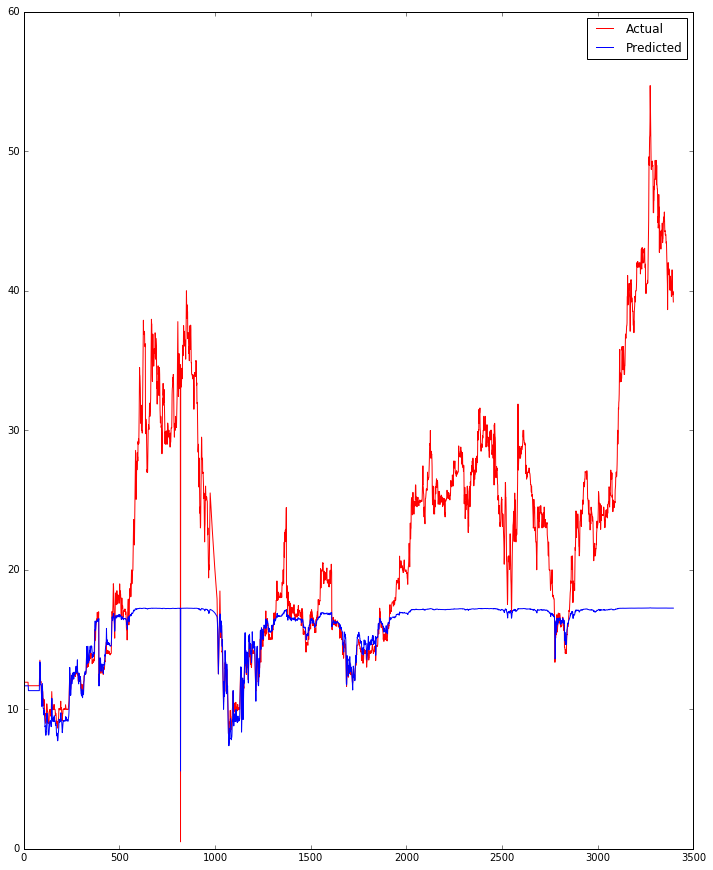

In [6]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-3396,0:3]
    ytrain =np.asarray(Y[0:-3396])
    xtest = X[-849:,0:3]
    ytest = np.asarray(Y[-849:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [8]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=10,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(949, 3, 1)
Tensor("input_3:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 949 samples, validate on 849 samples
Epoch 1/10
949/949 [==============================] - 13s 13ms/step - loss: 59.2209 - val_loss: 811.8575
Epoch 2/10
949/949 [==============================] - 6s 6ms/step - loss: 19.0558 - val_loss: 426.6584
Epoch 3/10
949/949 [==============================] - 5s 5ms/step - loss: 8.5358 - val_loss: 579.2624
Epoch 4/10
949/949 [==============================] - 4s 5ms/step - loss: 7.7076 - val_loss: 472.1223
Epoch 5/10
949/949 [==============================] - 6s 6ms/step - loss: 6.3626 - val_loss: 489.1962
Epoch 6/10
949/949 [==============================] - 6s 6ms/step - loss: 5.1206 - val_loss: 427.9768
Epoch 7/10
949/949 [==============================] - 4s 5ms/step - loss: 2.9873 - val_loss: 349.6227
Epoch 8/10
949/949 [==============================] - 6s 6ms/step - loss: 1.2483 - val_loss: 292.4069
Epoch 9/10
949/949 [==============================] - 5s 5ms/step - loss: 0.7448 - val_loss: 256.1721
Epoch 10/10
949/949 [===========

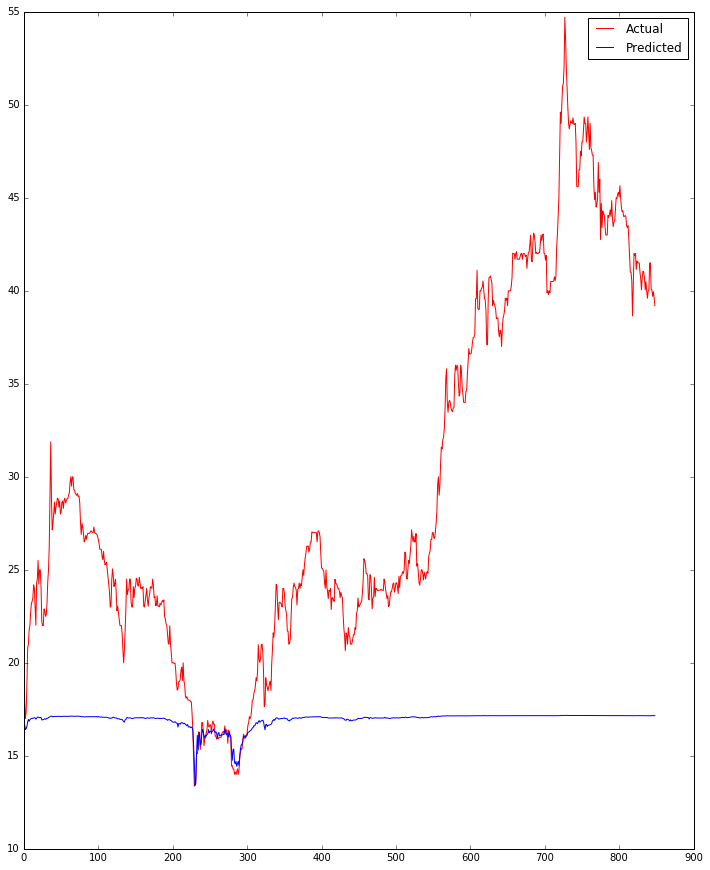

In [9]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-3000,0:3]
    ytrain =np.asarray(Y[0:-3000])
    xtest = X[4245:,0:3]
    ytest = np.asarray(Y[4245:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [11]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=10,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(1345, 3, 1)
Tensor("input_4:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 1345 samples, validate on 100 samples
Epoch 1/10
1345/1345 [==============================] - 11s 8ms/step - loss: 68.4779 - val_loss: 1359.3746
Epoch 2/10
1345/1345 [==============================] - 5s 4ms/step - loss: 12.5022 - val_loss: 1281.3225
Epoch 3/10
1345/1345 [==============================] - 5s 4ms/step - loss: 8.8375 - val_loss: 1082.8729
Epoch 4/10
1345/1345 [==============================] - 5s 4ms/step - loss: 6.8346 - val_loss: 1118.4634
Epoch 5/10
1345/1345 [==============================] - 6s 4ms/step - loss: 3.8564 - val_loss: 959.1811
Epoch 6/10
1345/1345 [==============================] - 6s 4ms/step - loss: 1.2148 - val_loss: 811.7012
Epoch 7/10
1345/1345 [==============================] - 6s 5ms/step - loss: 0.6526 - val_loss: 751.2386
Epoch 8/10
1345/1345 [==============================] - 5s 4ms/step - loss: 0.4396 - val_loss: 726.2453
Epoch 9/10
1345/1345 [==============================] - 5s 4ms/step - loss: 0.3567 - val_loss: 721.5608
Epoch 10/1

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-2000,0:3]
    ytrain =np.asarray(Y[0:-2000])
    xtest = X[-2000:,0:3]
    ytest = np.asarray(Y[-2000:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [13]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=10,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(2345, 3, 1)
Tensor("input_5:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 2345 samples, validate on 2000 samples
Epoch 1/10
2345/2345 [==============================] - 16s 7ms/step - loss: 180.4838 - val_loss: 113.9014
Epoch 2/10
2345/2345 [==============================] - 12s 5ms/step - loss: 78.4423 - val_loss: 171.7577
Epoch 3/10
2345/2345 [==============================] - 11s 4ms/step - loss: 47.8692 - val_loss: 82.1412
Epoch 4/10
2345/2345 [==============================] - 11s 5ms/step - loss: 14.3041 - val_loss: 34.2173
Epoch 5/10
2345/2345 [==============================] - 11s 5ms/step - loss: 3.9776 - val_loss: 19.2380
Epoch 6/10
2345/2345 [==============================] - 11s 4ms/step - loss: 1.7697 - val_loss: 13.7493
Epoch 7/10
2345/2345 [==============================] - 11s 5ms/step - loss: 1.0708 - val_loss: 11.4439
Epoch 8/10
2345/2345 [==============================] - 11s 5ms/step - loss: 0.8633 - val_loss: 9.9258
Epoch 9/10
2345/2345 [==============================] - 11s 5ms/step - loss: 0.7243 - val_loss: 8.8821
Epoch 10/10

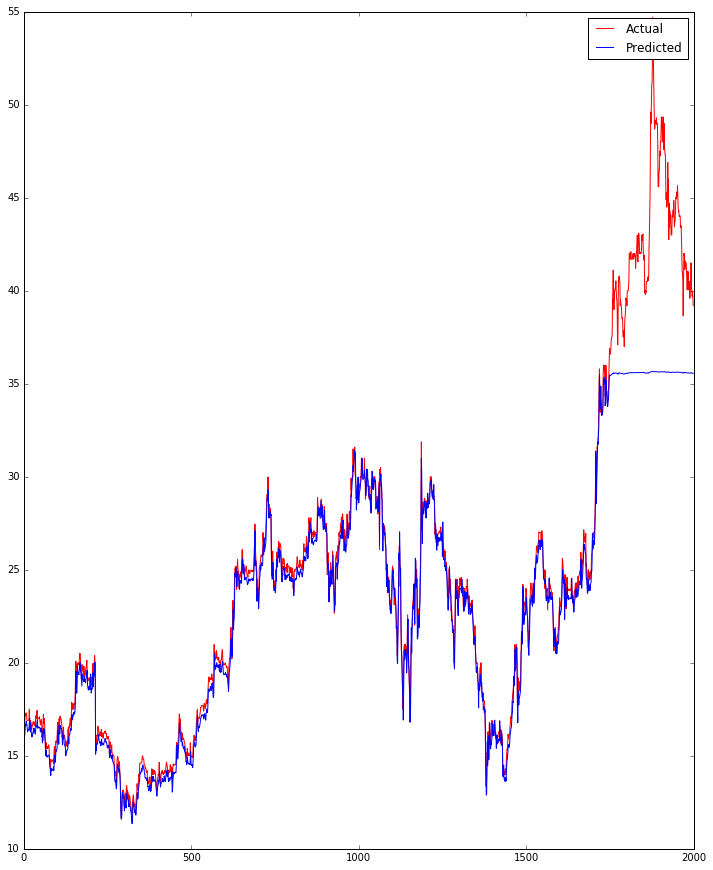

In [14]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-2000,0:3]
    ytrain =np.asarray(Y[0:-2000])
    xtest = X[-4000:,0:3]
    ytest = np.asarray(Y[-4000:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [16]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=2,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(2345, 3, 1)
Tensor("input_6:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 2345 samples, validate on 4000 samples
Epoch 1/2
2345/2345 [==============================] - 21s 9ms/step - loss: 180.6285 - val_loss: 98.7497
Epoch 2/2
2345/2345 [==============================] - 12s 5ms/step - loss: 78.4774 - val_loss: 123.6015
[12.818972 12.839064 12.842361 ... 14.518421 14.518487 14.51823 ]
[ 6.42  6.42  6.42 ... 39.95 39.65 39.2 ]
Plotting Results


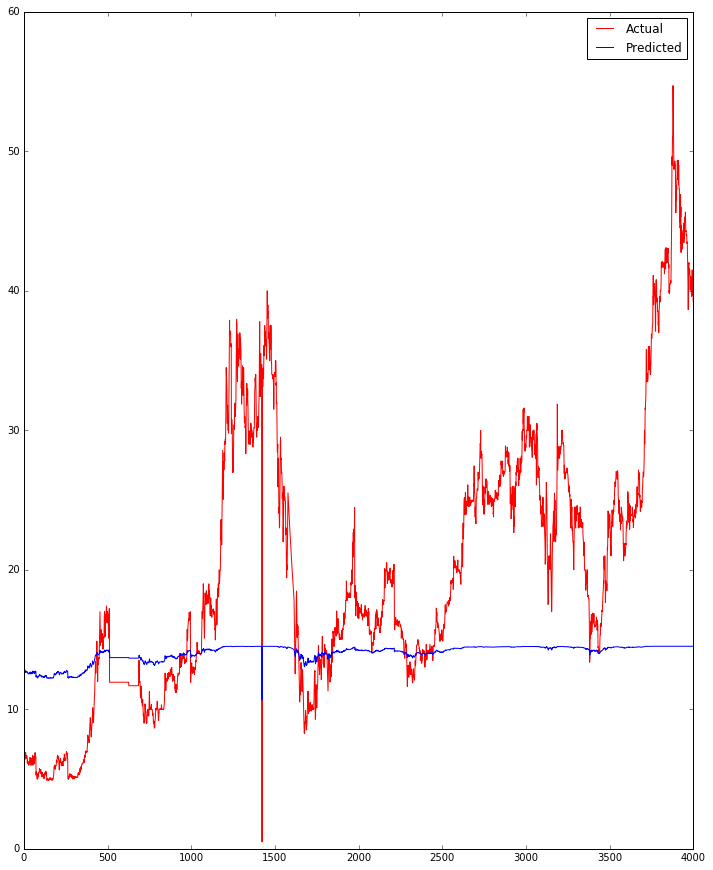

In [17]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-2000,0:3]
    ytrain =np.asarray(Y[0:-2000])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [19]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=2,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(2345, 3, 1)
Tensor("input_7:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 2345 samples, validate on 4345 samples
Epoch 1/2
2345/2345 [==============================] - 22s 10ms/step - loss: 180.6301 - val_loss: 101.1798
Epoch 2/2
2345/2345 [==============================] - 12s 5ms/step - loss: 78.5929 - val_loss: 116.3848
[11.415046 11.421078 11.431333 ... 14.547207 14.547263 14.547041]
[ 6.2   6.2   6.2  ... 39.95 39.65 39.2 ]
Plotting Results


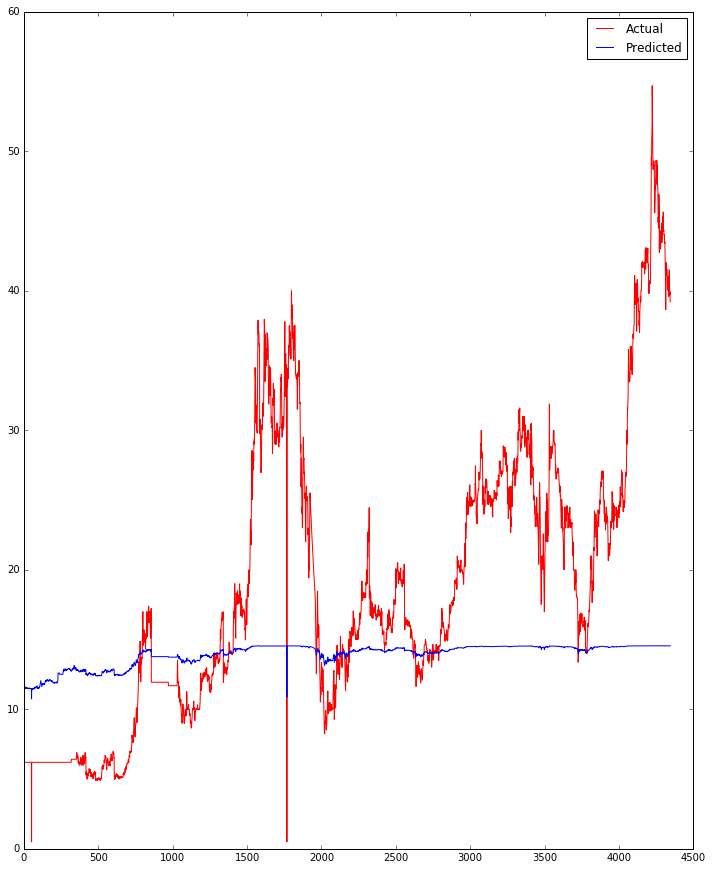

In [20]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-1000,0:3]
    ytrain =np.asarray(Y[0:-1000])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [23]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=2,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3345, 3, 1)
Tensor("input_8:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 3345 samples, validate on 4345 samples
Epoch 1/2
3345/3345 [==============================] - 25s 7ms/step - loss: 165.0674 - val_loss: 104.3701
Epoch 2/2
3345/3345 [==============================] - 16s 5ms/step - loss: 70.3605 - val_loss: 107.9209
[15.694614  15.695841  15.6979065 ... 16.34184   16.34184   16.34185  ]
[ 6.2   6.2   6.2  ... 39.95 39.65 39.2 ]
Plotting Results


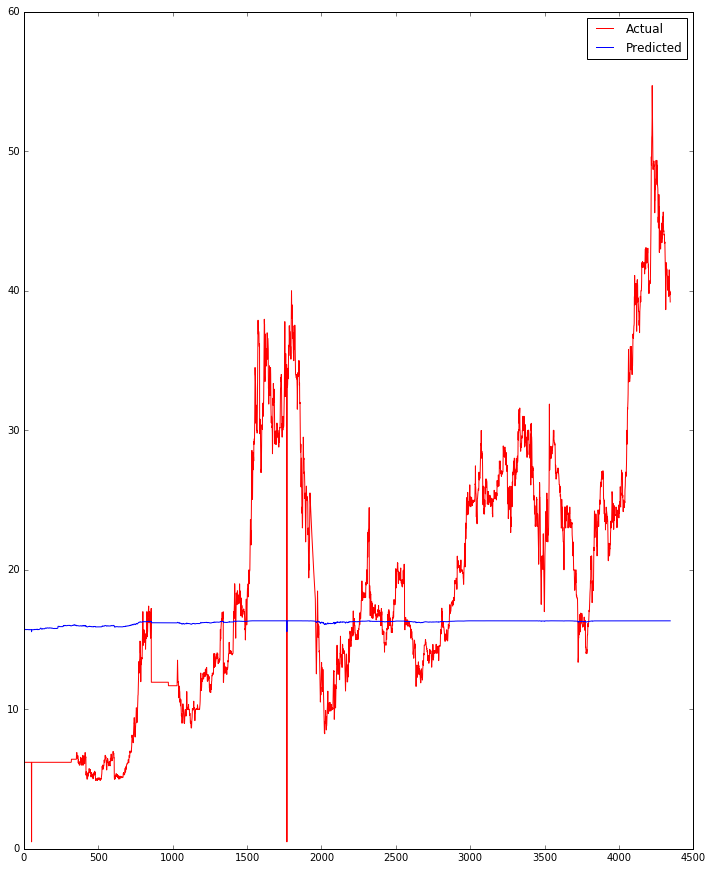

In [24]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-869,0:3]
    ytrain =np.asarray(Y[0:-869])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [26]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=2,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3476, 3, 1)
Tensor("input_9:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 3476 samples, validate on 4345 samples
Epoch 1/2
3476/3476 [==============================] - 26s 7ms/step - loss: 170.0433 - val_loss: 104.5378
Epoch 2/2
3476/3476 [==============================] - 17s 5ms/step - loss: 72.0373 - val_loss: 106.1612
[15.991953 15.993199 15.995281 ... 16.6702   16.670195 16.670218]
[ 6.2   6.2   6.2  ... 39.95 39.65 39.2 ]
Plotting Results


In [27]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=20,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3476, 3, 1)
Tensor("input_10:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [28]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=10,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3476, 3, 1)
Tensor("input_11:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [29]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=2,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3476, 3, 1)
Tensor("input_12:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [1]:
try:
    import pydot_ng as pydot
except ImportError:
    import pydot 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-869,0:3]
    ytrain =np.asarray(Y[0:-869])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

ImportError: cannot import name 'plot_model'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-869,0:3]
    ytrain =np.asarray(Y[0:-869])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

ImportError: cannot import name 'plot_model'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-869,0:3]
    ytrain =np.asarray(Y[0:-869])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=2,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3476, 3, 1)
Tensor("input_1:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 3476 samples, validate on 4345 samples
Epoch 1/2
3476/3476 [==============================] - 20s 6ms/step - loss: 170.3429 - val_loss: 104.6890
Epoch 2/2
3476/3476 [==============================] - 16s 5ms/step - loss: 72.0518 - val_loss: 106.2581
[15.983518 15.984737 15.98678  ... 16.65068  16.650677 16.650692]
[ 6.2   6.2   6.2  ... 39.95 39.65 39.2 ]
Plotting Results


In [3]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=20,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3476, 3, 1)
Tensor("input_2:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 3476 samples, validate on 4345 samples
Epoch 1/20
3476/3476 [==============================] - 19s 6ms/step - loss: 170.0436 - val_loss: 104.5364
Epoch 2/20
3476/3476 [==============================] - 16s 5ms/step - loss: 72.0092 - val_loss: 106.0032
Epoch 3/20
3476/3476 [==============================] - 16s 5ms/step - loss: 58.3085 - val_loss: 53.4136
Epoch 4/20
3476/3476 [==============================] - 16s 5ms/step - loss: 9.4569 - val_loss: 13.8601
Epoch 5/20
3476/3476 [==============================] - 16s 5ms/step - loss: 1.8813 - val_loss: 8.2979
Epoch 6/20
3476/3476 [==============================] - 16s 5ms/step - loss: 1.1505 - val_loss: 6.3247
Epoch 7/20
3476/3476 [==============================] - 17s 5ms/step - loss: 0.9271 - val_loss: 5.4565
Epoch 8/20
3476/3476 [==============================] - 17s 5ms/step - loss: 0.8301 - val_loss: 4.6876
Epoch 9/20
3476/3476 [==============================] - 16s 5ms/step - loss: 0.7473 - val_loss: 4.3488
Epoch 10/20
347

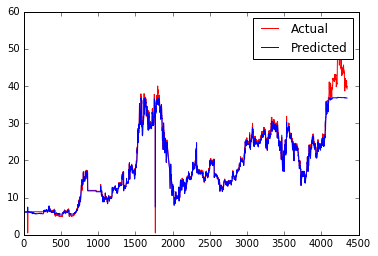

In [4]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto', dpi=100)
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:869,0:3]
    ytrain =np.asarray(Y[0:869])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [6]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=20,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(869, 3, 1)
Tensor("input_3:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 869 samples, validate on 4345 samples
Epoch 1/20
869/869 [==============================] - 10s 12ms/step - loss: 53.9503 - val_loss: 395.8557
Epoch 2/20
869/869 [==============================] - 7s 8ms/step - loss: 19.1616 - val_loss: 157.3340
Epoch 3/20
869/869 [==============================] - 7s 8ms/step - loss: 9.3673 - val_loss: 249.5337
Epoch 4/20
869/869 [==============================] - 7s 8ms/step - loss: 7.9071 - val_loss: 208.9867
Epoch 5/20
869/869 [==============================] - 7s 8ms/step - loss: 6.3187 - val_loss: 193.8934
Epoch 6/20
869/869 [==============================] - 8s 9ms/step - loss: 5.7337 - val_loss: 197.7735
Epoch 7/20
869/869 [==============================] - 7s 8ms/step - loss: 4.4959 - val_loss: 164.6225
Epoch 8/20
869/869 [==============================] - 7s 8ms/step - loss: 2.8296 - val_loss: 128.8433
Epoch 9/20
869/869 [==============================] - 7s 8ms/step - loss: 1.3098 - val_loss: 99.4505
Epoch 10/20
869/869 [===========

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-1303,0:3]
    ytrain =np.asarray(Y[0:-1303])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [8]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=20,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(3042, 3, 1)
Tensor("input_4:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 3042 samples, validate on 4345 samples
Epoch 1/20
3042/3042 [==============================] - 19s 6ms/step - loss: 155.3182 - val_loss: 105.4008
Epoch 2/20
3042/3042 [==============================] - 15s 5ms/step - loss: 65.2722 - val_loss: 114.8707
Epoch 3/20
3042/3042 [==============================] - 15s 5ms/step - loss: 56.4040 - val_loss: 82.0181
Epoch 4/20
3042/3042 [==============================] - 15s 5ms/step - loss: 17.5228 - val_loss: 22.8135
Epoch 5/20
3042/3042 [==============================] - 15s 5ms/step - loss: 3.9314 - val_loss: 10.6601
Epoch 6/20
3042/3042 [==============================] - 15s 5ms/step - loss: 1.4637 - val_loss: 7.0778
Epoch 7/20
3042/3042 [==============================] - 15s 5ms/step - loss: 0.9394 - val_loss: 5.7772
Epoch 8/20
3042/3042 [==============================] - 15s 5ms/step - loss: 0.8229 - val_loss: 4.8285
Epoch 9/20
3042/3042 [==============================] - 15s 5ms/step - loss: 0.7873 - val_loss: 4.4354
Epoch 10/20
3

In [9]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=20, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(3042, 3, 1)
Tensor("input_5:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 3042 samples, validate on 4345 samples
Epoch 1/20
3042/3042 [==============================] - 17s 6ms/step - loss: 246.4981 - val_loss: 300.0762
Epoch 2/20
3042/3042 [==============================] - 13s 4ms/step - loss: 101.9092 - val_loss: 132.8060
Epoch 3/20
3042/3042 [==============================] - 13s 4ms/step - loss: 50.3645 - val_loss: 66.3281
Epoch 4/20
3042/3042 [==============================] - 13s 4ms/step - loss: 15.4360 - val_loss: 26.0677
Epoch 5/20
3042/3042 [==============================] - 13s 4ms/step - loss: 5.1115 - val_loss: 13.5339
Epoch 6/20
3042/3042 [==============================] - 14s 4ms/step - loss: 2.4456 - val_loss: 8.6968
Epoch 7/20
3042/3042 [==============================] - 14s 5ms/step - loss: 1.3952 - val_loss: 6.5116
Epoch 8/20
3042/3042 [==============================] - 14s 5ms/step - loss: 1.1805 - val_loss: 5.4629
Epoch 9/20
3042/3042 [==============================] - 14s 5ms/step - loss: 0.9181 - val_loss: 4.6106
Epoch 10/20


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-1,0:3]
    ytrain =np.asarray(Y[0:-1])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

In [11]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=20, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_6:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/20
4344/4344 [==============================] - 21s 5ms/step - loss: 359.9141 - val_loss: 199.2565
Epoch 2/20
4344/4344 [==============================] - 18s 4ms/step - loss: 115.0891 - val_loss: 49.1405
Epoch 3/20
4344/4344 [==============================] - 18s 4ms/step - loss: 22.4378 - val_loss: 6.4045
Epoch 4/20
4344/4344 [==============================] - 19s 4ms/step - loss: 3.6144 - val_loss: 1.3062
Epoch 5/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.8849 - val_loss: 0.6475
Epoch 6/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.2379 - val_loss: 0.4166
Epoch 7/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.1212 - val_loss: 0.5564
Epoch 8/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0150 - val_loss: 0.4244
Epoch 9/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0285 - val_loss: 0.5064
Epoch 10/20
4344/

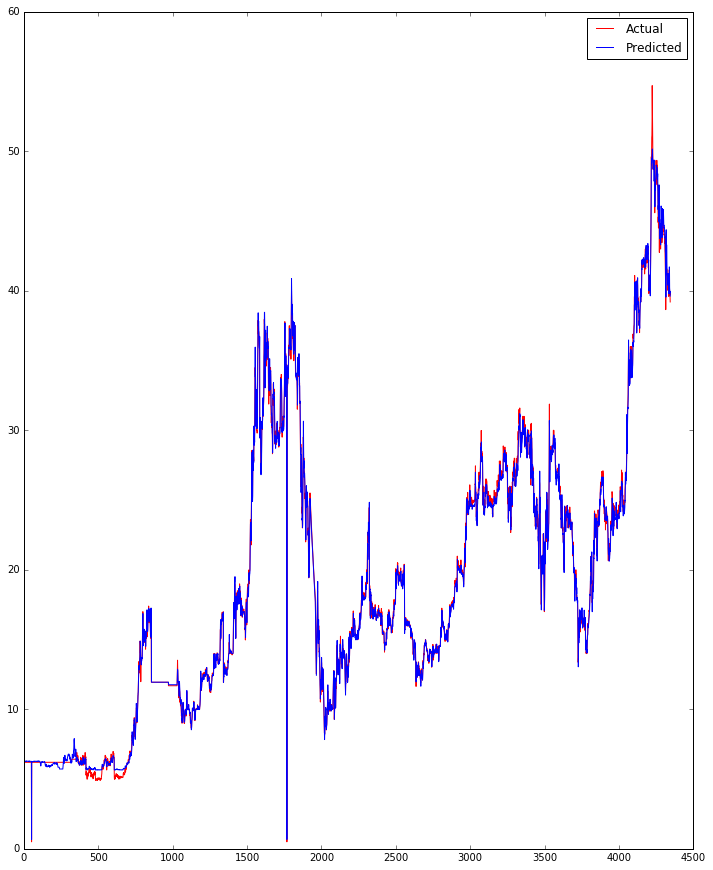

In [13]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto20Epoch', dpi=100)
plt.show()

In [14]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=30, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_7:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/30
4344/4344 [==============================] - 22s 5ms/step - loss: 359.9140 - val_loss: 199.2578
Epoch 2/30
4344/4344 [==============================] - 18s 4ms/step - loss: 115.1026 - val_loss: 49.1701
Epoch 3/30
4344/4344 [==============================] - 18s 4ms/step - loss: 22.8860 - val_loss: 7.4403
Epoch 4/30
4344/4344 [==============================] - 18s 4ms/step - loss: 4.1968 - val_loss: 1.2943
Epoch 5/30
4344/4344 [==============================] - 18s 4ms/step - loss: 1.6255 - val_loss: 0.5787
Epoch 6/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.3134 - val_loss: 1.2173
Epoch 7/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.1892 - val_loss: 0.4103
Epoch 8/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0275 - val_loss: 0.4170
Epoch 9/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0755 - val_loss: 0.5539
Epoch 10/30
4344/

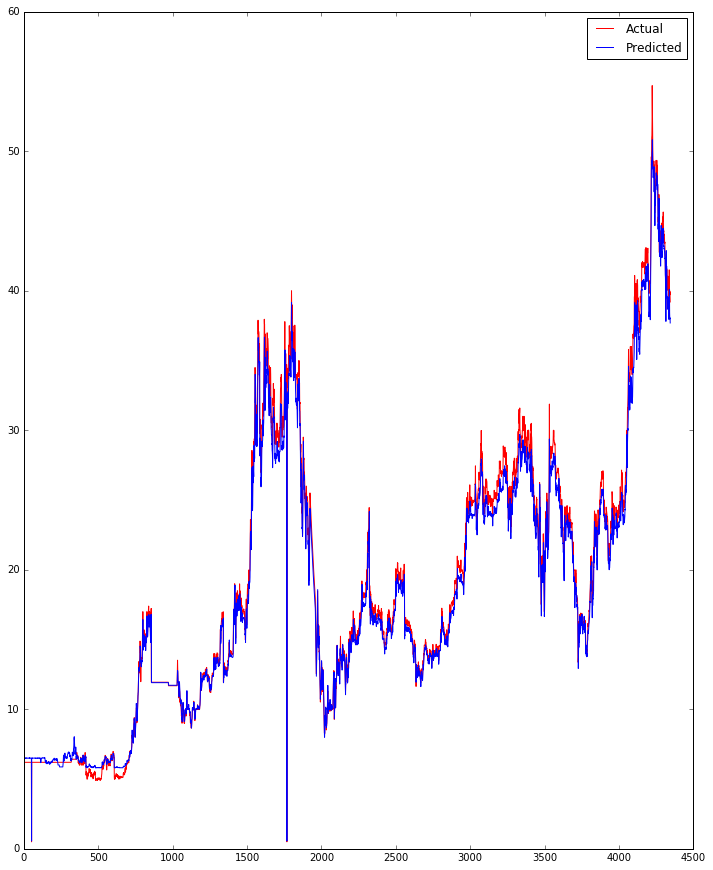

In [16]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto30Epoch', dpi=100)
plt.show()

In [17]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=50, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_8:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/50
4344/4344 [==============================] - 22s 5ms/step - loss: 359.9114 - val_loss: 199.2520
Epoch 2/50
4344/4344 [==============================] - 18s 4ms/step - loss: 115.0957 - val_loss: 49.1085
Epoch 3/50
4344/4344 [==============================] - 19s 4ms/step - loss: 22.4235 - val_loss: 7.1052
Epoch 4/50
4344/4344 [==============================] - 18s 4ms/step - loss: 4.0143 - val_loss: 1.5659
Epoch 5/50
4344/4344 [==============================] - 18s 4ms/step - loss: 1.8984 - val_loss: 0.6944
Epoch 6/50
4344/4344 [==============================] - 19s 4ms/step - loss: 1.2167 - val_loss: 1.0857
Epoch 7/50
4344/4344 [==============================] - 18s 4ms/step - loss: 1.2040 - val_loss: 0.3612
Epoch 8/50
4344/4344 [==============================] - 18s 4ms/step - loss: 0.9711 - val_loss: 0.3767
Epoch 9/50
4344/4344 [==============================] - 18s 4ms/step - loss: 1.0566 - val_loss: 0.8471
Epoch 10/50
4344/

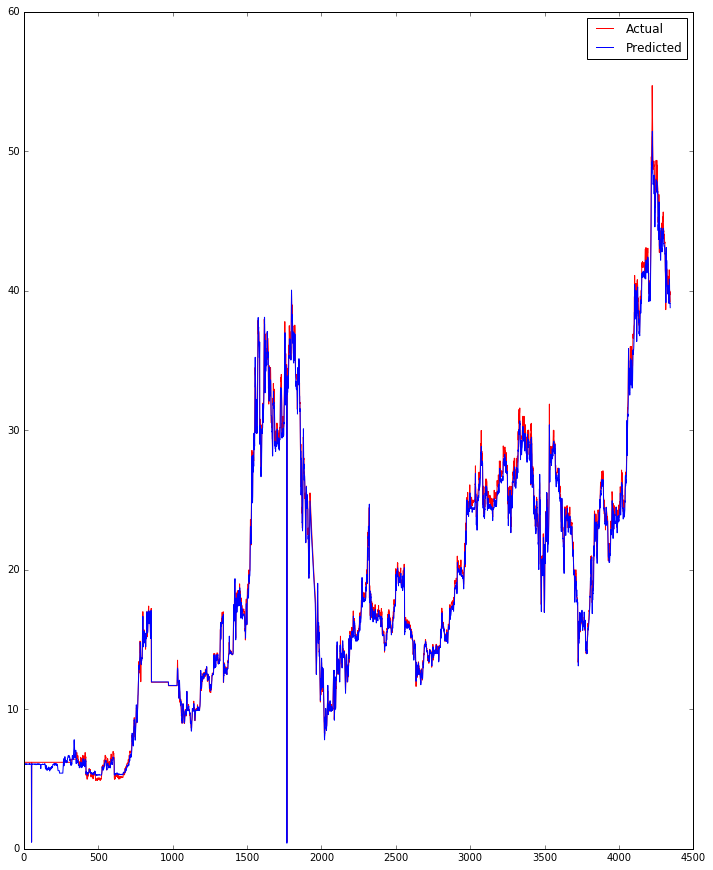

In [18]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto50Epoch', dpi=100)
plt.show()

In [19]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=20, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_9:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/20
4344/4344 [==============================] - 22s 5ms/step - loss: 359.9308 - val_loss: 199.2684
Epoch 2/20
4344/4344 [==============================] - 18s 4ms/step - loss: 115.1981 - val_loss: 49.3054
Epoch 3/20
4344/4344 [==============================] - 18s 4ms/step - loss: 22.0019 - val_loss: 6.6517
Epoch 4/20
4344/4344 [==============================] - 18s 4ms/step - loss: 3.6547 - val_loss: 1.5344
Epoch 5/20
4344/4344 [==============================] - 18s 4ms/step - loss: 1.7962 - val_loss: 0.6715
Epoch 6/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.1549 - val_loss: 0.6397
Epoch 7/20
4344/4344 [==============================] - 18s 4ms/step - loss: 1.1873 - val_loss: 0.3886
Epoch 8/20
4344/4344 [==============================] - 18s 4ms/step - loss: 0.9681 - val_loss: 0.4143
Epoch 9/20
4344/4344 [==============================] - 18s 4ms/step - loss: 1.0377 - val_loss: 0.5298
Epoch 10/20
4344/

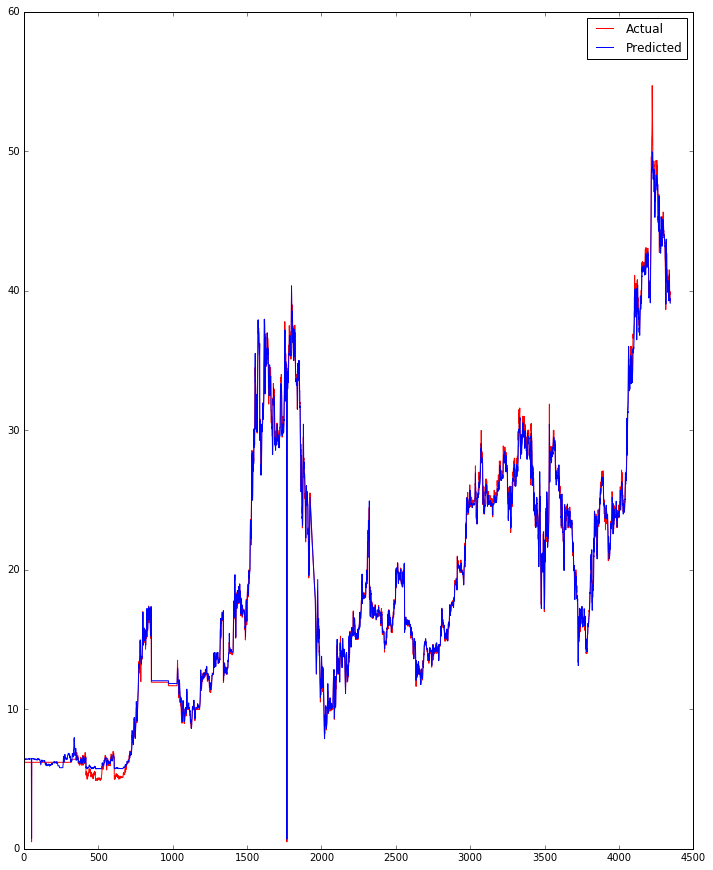

In [20]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 12,15
plt.savefig('Sto20Epoch', dpi=100)
plt.show()

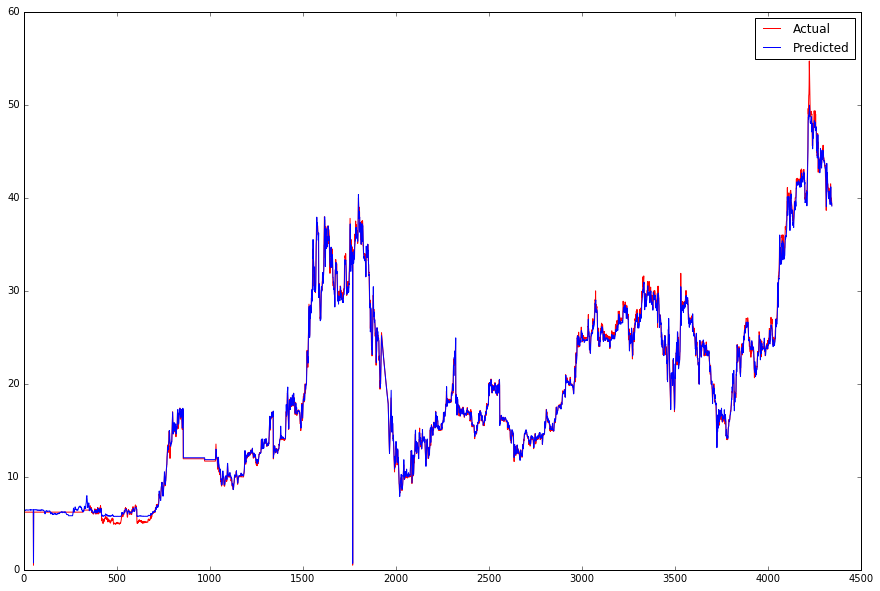

In [30]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch20', dpi=100)
plt.show()

In [31]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=30, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_10:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/30
4344/4344 [==============================] - 23s 5ms/step - loss: 359.8679 - val_loss: 198.9564
Epoch 2/30
4344/4344 [==============================] - 18s 4ms/step - loss: 114.7673 - val_loss: 48.8768
Epoch 3/30
4344/4344 [==============================] - 19s 4ms/step - loss: 21.9593 - val_loss: 5.5839
Epoch 4/30
4344/4344 [==============================] - 19s 4ms/step - loss: 3.3866 - val_loss: 1.3814
Epoch 5/30
4344/4344 [==============================] - 21s 5ms/step - loss: 1.8911 - val_loss: 0.7799
Epoch 6/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.2136 - val_loss: 0.5132
Epoch 7/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.2002 - val_loss: 0.4066
Epoch 8/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0198 - val_loss: 0.6056
Epoch 9/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0342 - val_loss: 0.4378
Epoch 10/30
4344/

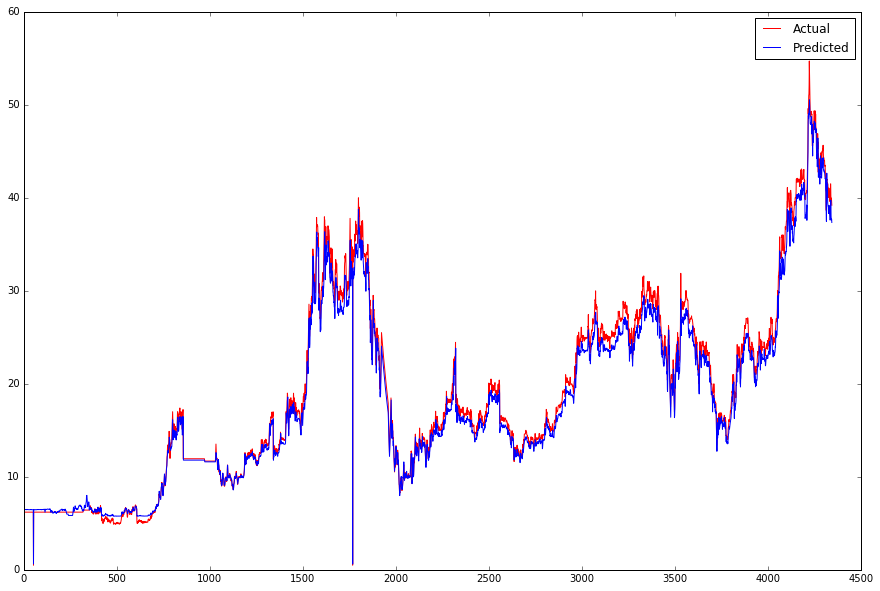

In [32]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch30', dpi=100)
plt.show()

In [33]:
filename

'~//Desktop//My Project Files//source//GTB_new_StockData.csv'

In [34]:
df = pd.read_csv(filename)

In [35]:
df

,Date,Open,High,Volume,Close
0,02/01/2000,2.20,2.21,357600,6.20
1,02/02/2000,2.21,2.23,392500,6.20
2,02/03/2000,2.24,2.25,170900,6.20
3,02/04/2000,2.25,2.35,6500,6.20
4,02/07/2000,2.46,2.46,15000,6.20
5,02/08/2000,2.48,2.49,39930,6.20
6,02/09/2000,2.61,2.61,10000,6.20
7,02/10/2000,2.63,2.70,138325,6.20
8,02/11/2000,2.70,2.73,214375,6.20
9,2/14/2000,2.57,2.57,48560,6.20


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 5 columns):
Date        4345 non-null object
 Open       4345 non-null float64
 High       4345 non-null float64
 Volume     4345 non-null int64
 Close      4345 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 169.8+ KB


In [39]:
df.describe()

,Open,High,Volume,Close
count,4345.000000,4345.000000,4.345000e+03,4345.000000
mean,18.761335,18.990053,1.264011e+07,18.916522
std,10.381650,10.501384,1.572351e+07,10.154716
min,0.500000,0.500000,4.000000e+02,0.500000
25%,11.710000,11.940000,2.714312e+06,11.700000
50%,16.800000,16.990000,8.214812e+06,16.770000
75%,25.300000,25.600000,1.700686e+07,25.260000
max,54.990000,57.000000,3.356055e+08,54.710000


In [40]:
df.head()

,Date,Open,High,Volume,Close
0,02/01/2000,2.20,2.21,357600,6.2
1,02/02/2000,2.21,2.23,392500,6.2
2,02/03/2000,2.24,2.25,170900,6.2
3,02/04/2000,2.25,2.35,6500,6.2
4,02/07/2000,2.46,2.46,15000,6.2


In [2]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=10,verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(2345, 3, 1)
Tensor("input_1:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 2345 samples, validate on 2000 samples
Epoch 1/10
2345/2345 [==============================] - 14s 6ms/step - loss: 258.3180 - val_loss: 530.7602
Epoch 2/10
2345/2345 [==============================] - 10s 4ms/step - loss: 147.0444 - val_loss: 283.6803
Epoch 3/10
2345/2345 [==============================] - 11s 5ms/step - loss: 84.2162 - val_loss: 183.3452
Epoch 4/10
2345/2345 [==============================] - 16s 7ms/step - loss: 46.4711 - val_loss: 89.9921
Epoch 5/10
2345/2345 [==============================] - 15s 6ms/step - loss: 15.7706 - val_loss: 39.1521
Epoch 6/10
2345/2345 [==============================] - 13s 5ms/step - loss: 5.1660 - val_loss: 21.1923
Epoch 7/10
2345/2345 [==============================] - 14s 6ms/step - loss: 1.7911 - val_loss: 13.7803
Epoch 8/10
2345/2345 [==============================] - 13s 6ms/step - loss: 1.0929 - val_loss: 8.3362
Epoch 9/10
2345/2345 [==============================] - 13s 6ms/step - loss: 0.8538 - val_loss: 6.9740
Epoch 10

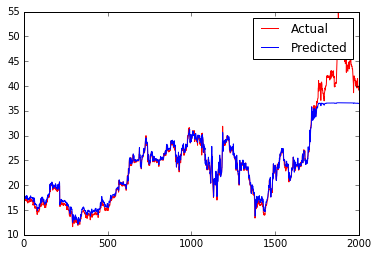

In [3]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch30', dpi=100)
plt.show()

In [4]:
filename

'~//Desktop//My Project Files//source//GTB_new_StockData.csv'

In [5]:
df = pd.read_csv(filename)

In [6]:
df

,Date,Open,High,Volume,Close
0,02/01/2000,2.20,2.21,357600,6.20
1,02/02/2000,2.21,2.23,392500,6.20
2,02/03/2000,2.24,2.25,170900,6.20
3,02/04/2000,2.25,2.35,6500,6.20
4,02/07/2000,2.46,2.46,15000,6.20
5,02/08/2000,2.48,2.49,39930,6.20
6,02/09/2000,2.61,2.61,10000,6.20
7,02/10/2000,2.63,2.70,138325,6.20
8,02/11/2000,2.70,2.73,214375,6.20
9,2/14/2000,2.57,2.57,48560,6.20


In [8]:
np.corrcoef(df[0:2], df[1:3])

TypeError: Can't convert 'float' object to str implicitly

In [9]:
type(df.High)

AttributeError: 'DataFrame' object has no attribute 'High'

In [11]:
Date = df.Date

ValueError: x and y must have same first dimension

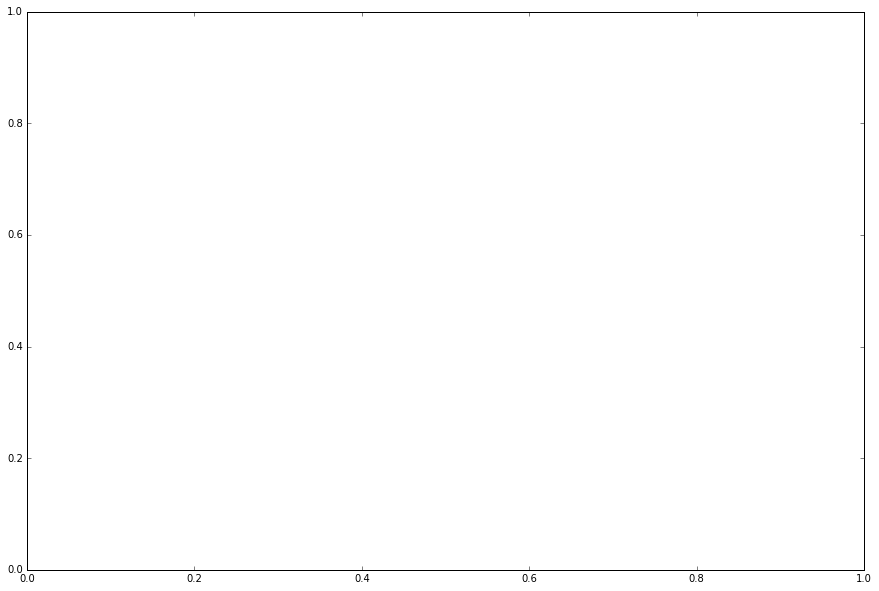

In [13]:
plt.plot(Date, predicted)

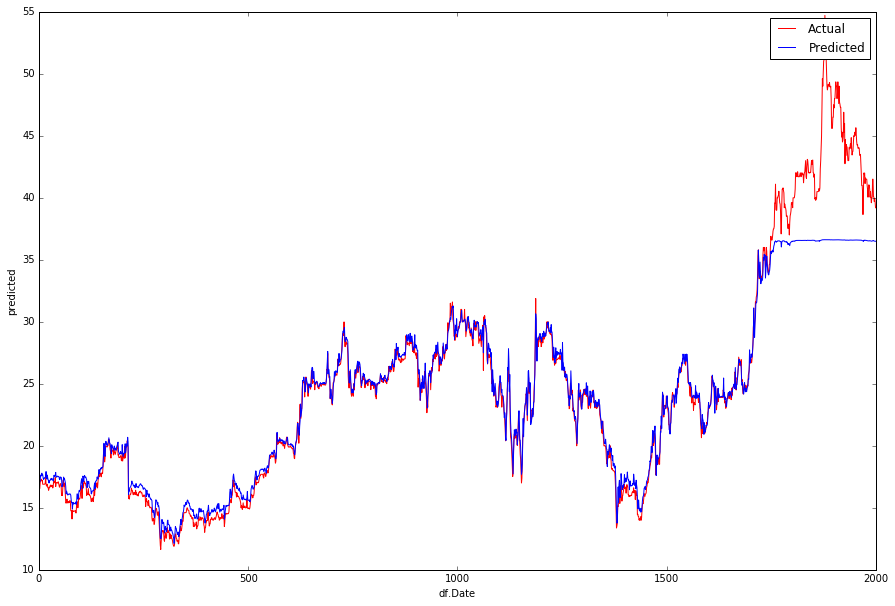

In [15]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
plt.xlabel('df.Date')
plt.ylabel('predicted')
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch30', dpi=100)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-1,0:3]
    ytrain =np.asarray(Y[0:-1])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=1, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_2:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("p_...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/1
4344/4344 [==============================] - 20s 5ms/step - loss: 359.9101 - val_loss: 199.2519
[[8.95876 ]
 [8.959072]
 [8.959997]
 ...
 [9.110415]
 [9.110449]
 [9.110409]]
[ 6.2   6.2   6.2  ... 39.95 39.65 39.2 ]
Plotting Results


In [4]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=50, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_3:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("p_...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/50
4344/4344 [==============================] - 21s 5ms/step - loss: 157.9757 - val_loss: 40.4945
Epoch 2/50
4344/4344 [==============================] - 19s 4ms/step - loss: 18.5207 - val_loss: 6.9417
Epoch 3/50
4344/4344 [==============================] - 19s 4ms/step - loss: 6.9749 - val_loss: 3.5891
Epoch 4/50
4344/4344 [==============================] - 20s 5ms/step - loss: 4.8883 - val_loss: 2.9251
Epoch 5/50
4344/4344 [==============================] - 20s 4ms/step - loss: 3.8057 - val_loss: 1.2801
Epoch 6/50
4344/4344 [==============================] - 22s 5ms/step - loss: 3.4575 - val_loss: 0.6437
Epoch 7/50
4344/4344 [==============================] - 19s 4ms/step - loss: 3.2236 - val_loss: 0.6595
Epoch 8/50
4344/4344 [==============================] - 19s 4ms/step - loss: 3.3428 - val_loss: 0.6631
Epoch 9/50
4344/4344 [==============================] - 20s 5ms/step - loss: 3.5029 - val_loss: 0.3916
Epoch 10/50
4344/4344

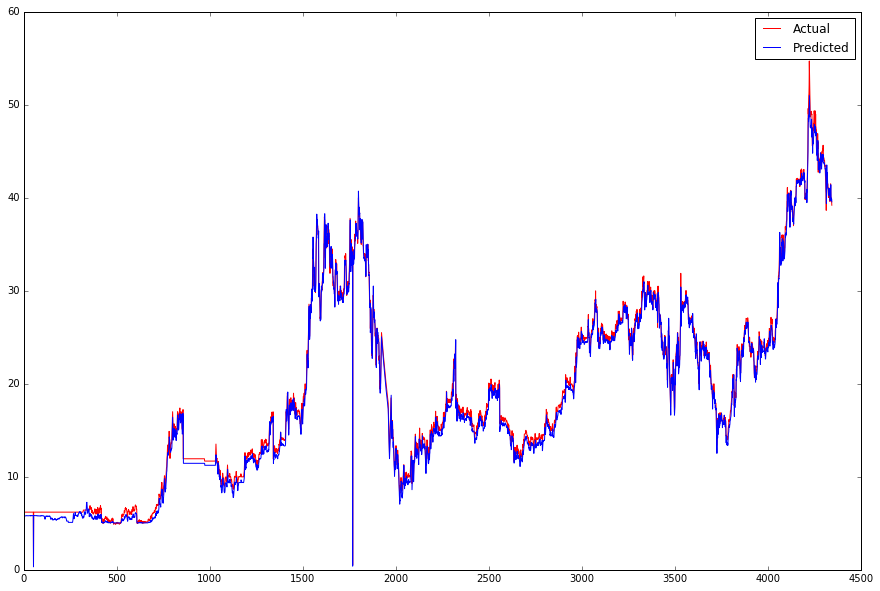

In [6]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')

plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch50drop05', dpi=100)
plt.show()

AttributeError: 'str' object has no attribute 'Date'

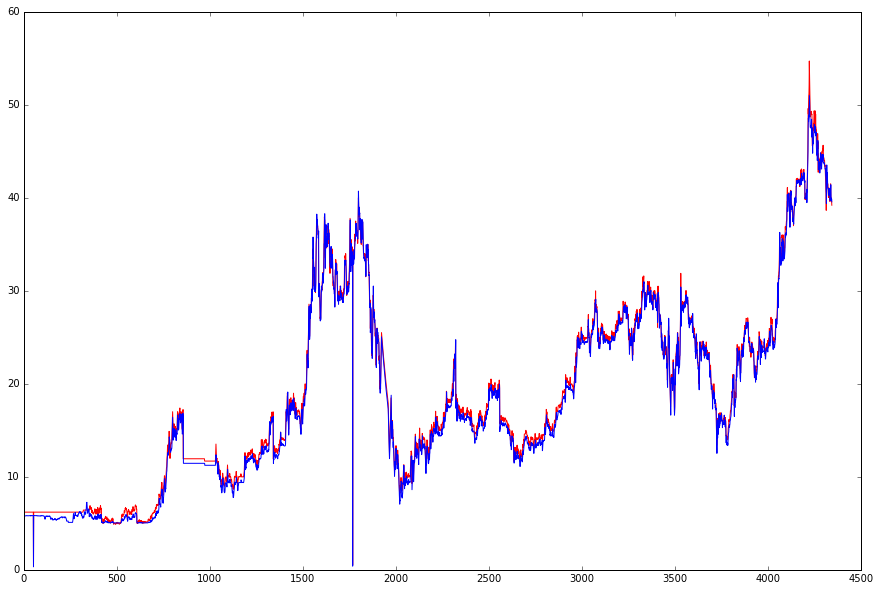

In [13]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)

plt.xticks(filename.Date ,rotation=45)
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch50drop05', dpi=100)
plt.show()



In [14]:
filename

'~//Desktop//My Project Files//source//GTB_new_StockData.csv'

In [15]:
df = pd.read_csv(filename)

In [16]:
df

,Date,Open,High,Volume,Close
0,02/01/2000,2.20,2.21,357600,6.20
1,02/02/2000,2.21,2.23,392500,6.20
2,02/03/2000,2.24,2.25,170900,6.20
3,02/04/2000,2.25,2.35,6500,6.20
4,02/07/2000,2.46,2.46,15000,6.20
5,02/08/2000,2.48,2.49,39930,6.20
6,02/09/2000,2.61,2.61,10000,6.20
7,02/10/2000,2.63,2.70,138325,6.20
8,02/11/2000,2.70,2.73,214375,6.20
9,2/14/2000,2.57,2.57,48560,6.20


In [19]:
df.Date[:-1]

0       02/01/2000
1       02/02/2000
2       02/03/2000
3       02/04/2000
4       02/07/2000
5       02/08/2000
6       02/09/2000
7       02/10/2000
8       02/11/2000
9        2/14/2000
10       2/15/2000
11       2/16/2000
12       2/17/2000
13       2/18/2000
14       2/21/2000
15       2/22/2000
16       2/23/2000
17       2/24/2000
18       2/25/2000
19       2/28/2000
20       2/29/2000
21      03/01/2000
22      03/02/2000
23      03/03/2000
24      03/06/2000
25      03/07/2000
26      03/08/2000
27      03/09/2000
28      03/10/2000
29       3/13/2000
           ...    
4314    06/01/2018
4315    06/04/2018
4316    06/05/2018
4317    06/06/2018
4318    06/07/2018
4319    06/08/2018
4320    06/11/2018
4321    06/12/2018
4322    13/06/2018
4323    14/06/2018
4324    19/06/2018
4325    20/06/2018
4326    21/06/2018
4327    22/06/2018
4328    25/06/2018
4329    26/06/2018
4330    27/06/2018
4331    28/06/2018
4332    29/06/2018
4333    07/02/2018
4334    07/03/2018
4335    07/0

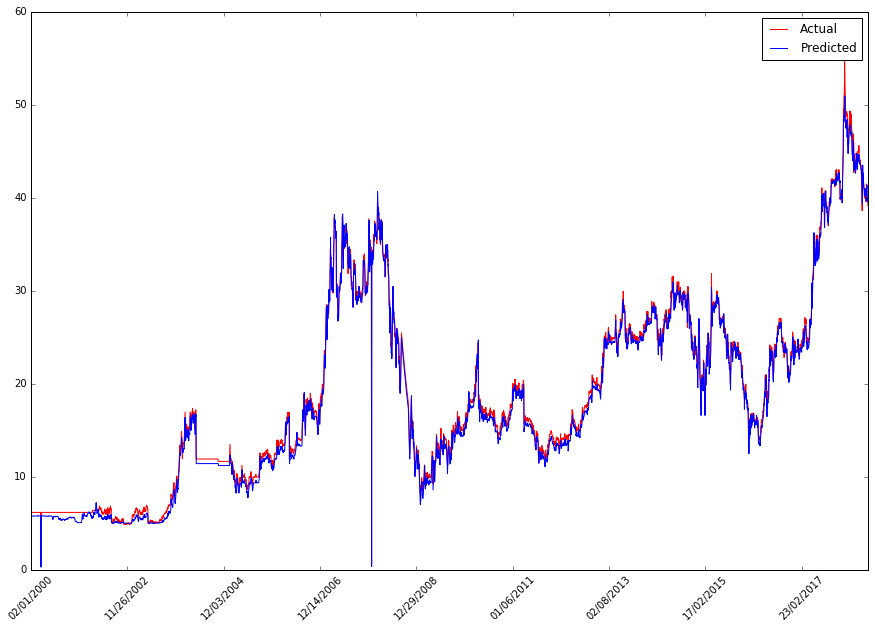

In [21]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
#from pylab import rcParams
#rcParams['figure.figsize'] = 15,10
#plt.savefig('Sto1510Epoch50drop05', dpi=100)
plt.show()

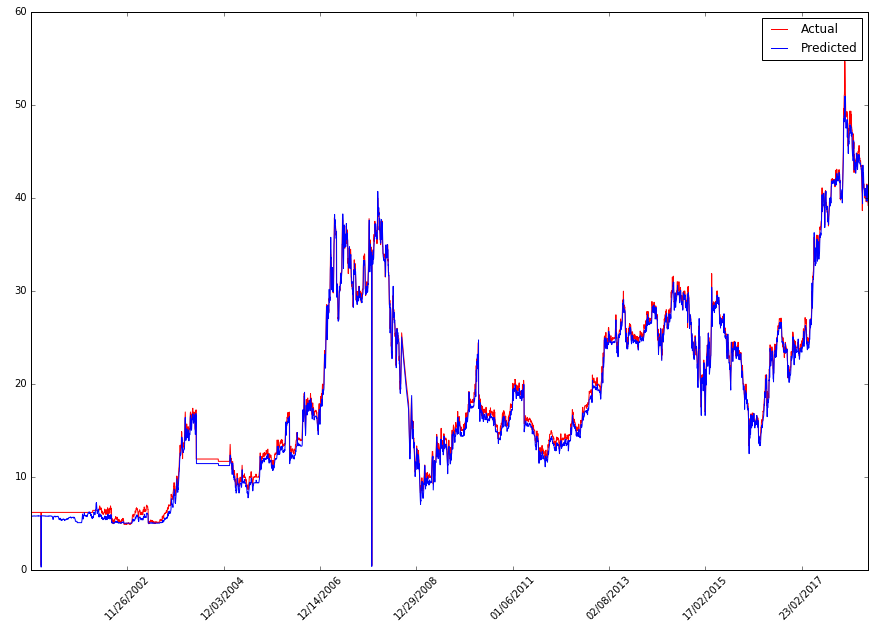

In [27]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
#from pylab import rcParams
#rcParams['figure.figsize'] = 15,10
#plt.savefig('Sto1510Epoch50drop05', dpi=100)
plt.show()

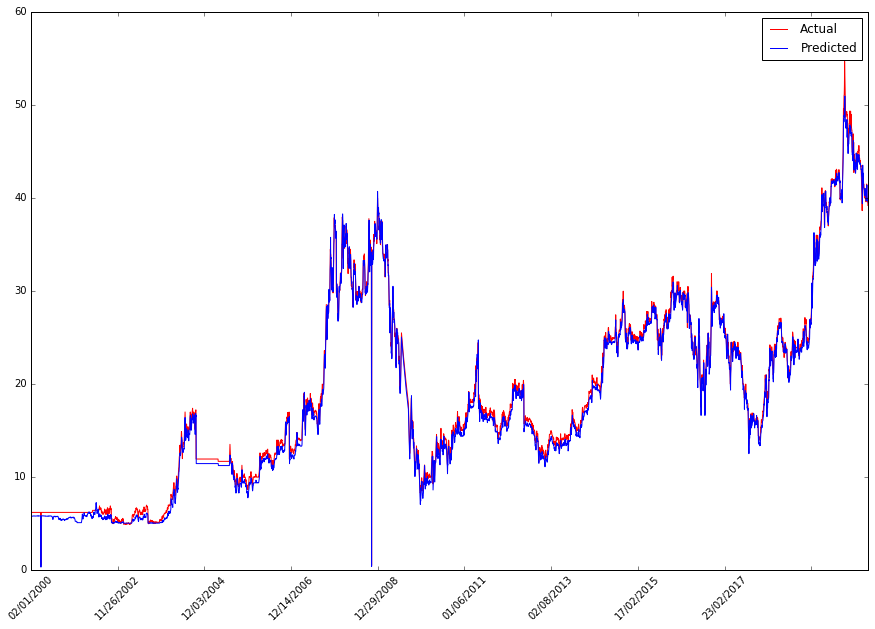

In [34]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],450),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
#from pylab import rcParams
#rcParams['figure.figsize'] = 15,10
#plt.savefig('Sto1510Epoch50drop05', dpi=100)
plt.show()

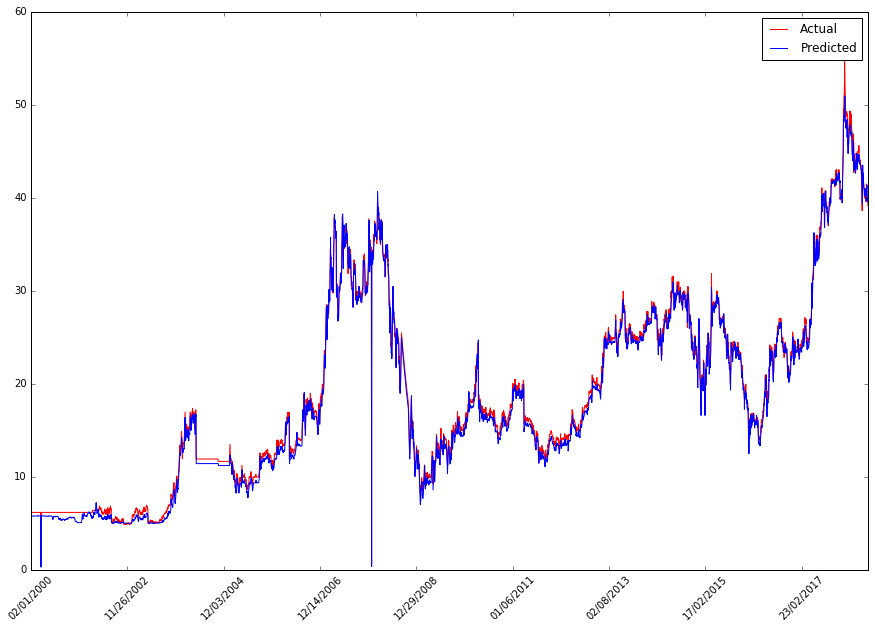

In [35]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
#from pylab import rcParams
#rcParams['figure.figsize'] = 15,10
#plt.savefig('Sto1510Epoch50drop05', dpi=100)
plt.show()

In [36]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(3.0)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=50, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_4:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("p_...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/50
4344/4344 [==============================] - 20s 5ms/step - loss: 136.7602 - val_loss: 23.2696
Epoch 2/50
4344/4344 [==============================] - 19s 4ms/step - loss: 9.5340 - val_loss: 3.8635
Epoch 3/50
4344/4344 [==============================] - 20s 5ms/step - loss: 2.4027 - val_loss: 1.4581
Epoch 4/50
4344/4344 [==============================] - 18s 4ms/step - loss: 1.1265 - val_loss: 0.9088
Epoch 5/50
4344/4344 [==============================] - 21s 5ms/step - loss: 0.7650 - val_loss: 0.6384
Epoch 6/50
4344/4344 [==============================] - 22s 5ms/step - loss: 0.5882 - val_loss: 0.5101
Epoch 7/50
4344/4344 [==============================] - 19s 4ms/step - loss: 0.4889 - val_loss: 0.4046
Epoch 8/50
4344/4344 [==============================] - 21s 5ms/step - loss: 0.4188 - val_loss: 0.4318
Epoch 9/50
4344/4344 [==============================] - 21s 5ms/step - loss: 0.3756 - val_loss: 0.4039
Epoch 10/50
4344/4344 

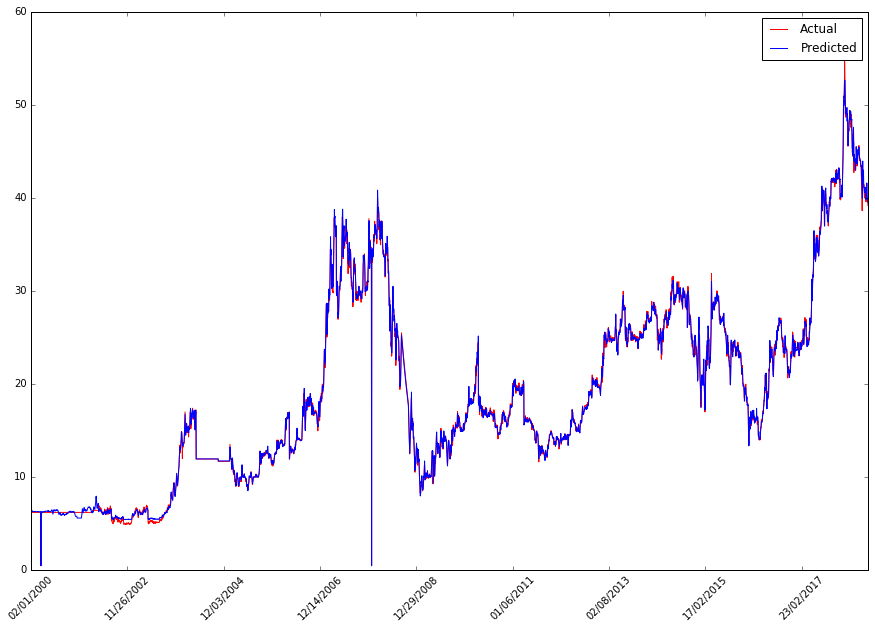

In [39]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch50drop30', dpi=100)
plt.show()

In [40]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=20, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_5:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("p_...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/20
4344/4344 [==============================] - 21s 5ms/step - loss: 359.9145 - val_loss: 199.2582
Epoch 2/20
4344/4344 [==============================] - 18s 4ms/step - loss: 115.1050 - val_loss: 49.1070
Epoch 3/20
4344/4344 [==============================] - 18s 4ms/step - loss: 22.4465 - val_loss: 6.8207
Epoch 4/20
4344/4344 [==============================] - 18s 4ms/step - loss: 3.8343 - val_loss: 1.3670
Epoch 5/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.5888 - val_loss: 0.6755
Epoch 6/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.2186 - val_loss: 1.4671
Epoch 7/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.1476 - val_loss: 0.4179
Epoch 8/20
4344/4344 [==============================] - 19s 4ms/step - loss: 0.9714 - val_loss: 0.4277
Epoch 9/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0907 - val_loss: 0.7660
Epoch 10/20
4344/

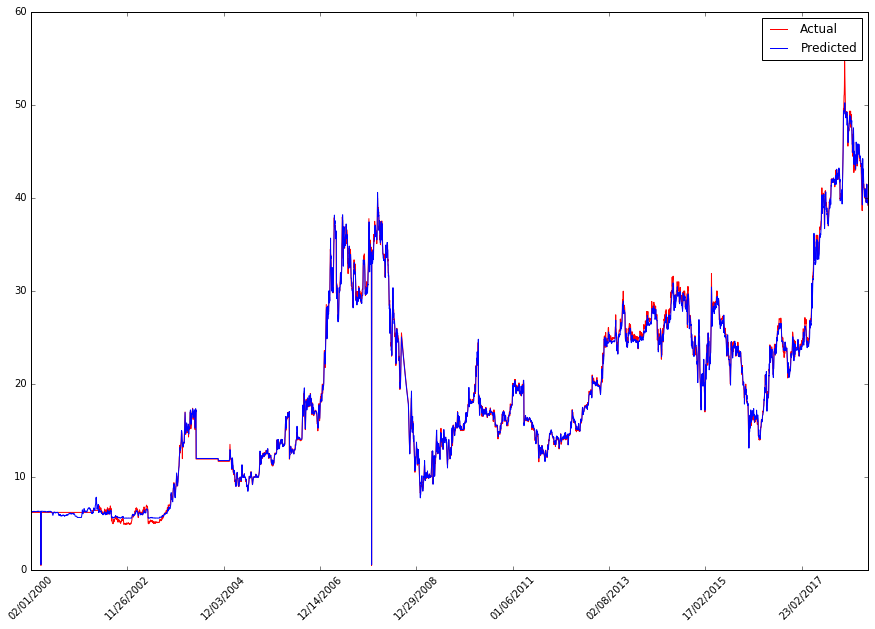

In [41]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch20drop025', dpi=100)
plt.show()

In [42]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=30, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_6:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("p_...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/30
4344/4344 [==============================] - 21s 5ms/step - loss: 359.9146 - val_loss: 199.2581
Epoch 2/30
4344/4344 [==============================] - 18s 4ms/step - loss: 115.1064 - val_loss: 49.2596
Epoch 3/30
4344/4344 [==============================] - 19s 4ms/step - loss: 22.3360 - val_loss: 6.3413
Epoch 4/30
4344/4344 [==============================] - 18s 4ms/step - loss: 3.8034 - val_loss: 1.3802
Epoch 5/30
4344/4344 [==============================] - 18s 4ms/step - loss: 1.8886 - val_loss: 0.6926
Epoch 6/30
4344/4344 [==============================] - 18s 4ms/step - loss: 1.2822 - val_loss: 0.8068
Epoch 7/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.1891 - val_loss: 0.4832
Epoch 8/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0776 - val_loss: 0.5459
Epoch 9/30
4344/4344 [==============================] - 19s 4ms/step - loss: 1.0808 - val_loss: 0.3348
Epoch 10/30
4344/

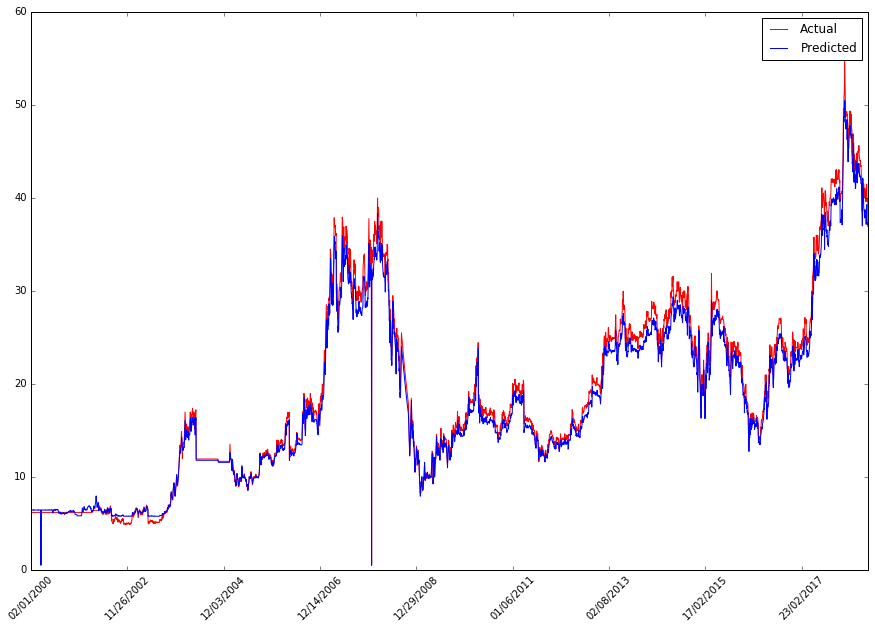

In [43]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch30drop025', dpi=100)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-2000,0:3]
    ytrain =np.asarray(Y[0:-2000])
    xtest = X[-2000:,0:3]
    ytest = np.asarray(Y[-2000:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=10,verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(2345, 3, 1)
Tensor("input_1:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 2345 samples, validate on 2000 samples
Epoch 1/10
2345/2345 [==============================] - 14s 6ms/step - loss: 180.7488 - val_loss: 113.2626
Epoch 2/10
2345/2345 [==============================] - 10s 4ms/step - loss: 77.7970 - val_loss: 169.5963
Epoch 3/10
2345/2345 [==============================] - 10s 4ms/step - loss: 45.0288 - val_loss: 77.9789
Epoch 4/10
2345/2345 [==============================] - 10s 4ms/step - loss: 13.6796 - val_loss: 33.9458
Epoch 5/10
2345/2345 [==============================] - 10s 4ms/step - loss: 4.0488 - val_loss: 19.7504
Epoch 6/10
2345/2345 [==============================] - 10s 4ms/step - loss: 1.6314 - val_loss: 14.0415
Epoch 7/10
2345/2345 [==============================] - 10s 4ms/step - loss: 1.0160 - val_loss: 11.7019
Epoch 8/10
2345/2345 [==============================] - 10s 4ms/step - loss: 0.8665 - val_loss: 10.0486
Epoch 9/10
2345/2345 [==============================] - 11s 5ms/step - loss: 0.8710 - val_loss: 9.1886
Epoch 10/1

In [3]:
filename

'~//Desktop//My Project Files//source//GTB_new_StockData.csv'

In [4]:
df = pd.read_csv(filename)

In [5]:
df

,Date,Open,High,Volume,Close
0,02/01/2000,2.20,2.21,357600,6.20
1,02/02/2000,2.21,2.23,392500,6.20
2,02/03/2000,2.24,2.25,170900,6.20
3,02/04/2000,2.25,2.35,6500,6.20
4,02/07/2000,2.46,2.46,15000,6.20
5,02/08/2000,2.48,2.49,39930,6.20
6,02/09/2000,2.61,2.61,10000,6.20
7,02/10/2000,2.63,2.70,138325,6.20
8,02/11/2000,2.70,2.73,214375,6.20
9,2/14/2000,2.57,2.57,48560,6.20


KeyError: 'Open'

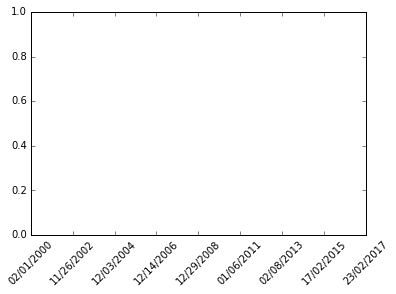

In [6]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(df['Open'], label='Open',color='red')
line2, = plt.plot(df['High'], label='High',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('OpenANDHigh', dpi=100)
plt.show()

In [11]:
add = df['Open'] + df['Close']

KeyError: 'Open'

In [14]:
df["Open"]

KeyError: 'Open'

In [15]:
df.Open

AttributeError: 'DataFrame' object has no attribute 'Open'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-2000,0:3]
    ytrain =np.asarray(Y[0:-2000])
    xtest = X[-2000:,0:3]
    ytest = np.asarray(Y[-2000:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))#open high and volume as input
print (input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = Bidirectional(LSTM(32*2**i,return_sequences=True))(x)
    x = Activation('relu')(x)
    
x = Bidirectional(LSTM(512,return_sequences=False))(x)
x = Activation('relu')(x)    
x=Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x=PReLU(alpha_initializer='zeros',
       alpha_regularizer=None,
       alpha_constraint=None,
       shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam=Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

checkpoint_callback = ModelCheckpoint("~/Desktop/My Project Files/",
                                      monitor="val_loss", verbose=0,save_best_only=True,
                                      save_weights_only=False, mode="auto",period=1)

model.fit(
    X_train, ytrain,
    batch_size=100, epochs=1, verbose=1,
    validation_data=(X_test,ytest),initial_epoch = 0,
)

predicted = model.predict(X_test)
#print (predicted)
#print (ytest)
predicted = np.reshape(predicted, (predicted.size,))
print (predicted)
print (ytest)

print('Plotting Results')

(2345, 3, 1)
Tensor("input_1:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 2345 samples, validate on 2000 samples
Epoch 1/1
2345/2345 [==============================] - 14s 6ms/step - loss: 180.6765 - val_loss: 113.3164
[18.189028 18.187653 18.18503  ... 18.184618 18.18448  18.184994]
[16.52 16.55 16.55 ... 39.95 39.65 39.2 ]
Plotting Results


In [5]:
test - ytest

NameError: name 'test' is not defined

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import*
from keras.layers import*
import os as os
from keras.callbacks import ModelCheckpoint
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_DEVICE_DEVICES"] = "0"
def getData_nex(filename):
    data = pd.read_csv(filename, header=0,index_col='Date',names=[str('Date'),'Open','High','Volume','Close'])
    Open = data.Open
    High = data.High
    Volume = data.Volume
    Close = data.Close
    DATA = np.column_stack((Open,High,Volume,Close))
    data = DATA
    X = data[:, 0:3]
    Y = data[:, 3]
    xtrain = X[0:-1,0:3]
    ytrain =np.asarray(Y[0:-1])
    xtest = X[-4346:,0:3]
    ytest = np.asarray(Y[-4346:])
    X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
    print(X_train.shape)
    X_test = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
    return X_train,X_test,ytrain,ytest

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(1234)
filename = "~//Desktop//My Project Files//source//GTB_new_StockData.csv"
# --------------------------------------------------------------------------
[X_train, X_test, ytrain, ytest] = getData_nex(filename)
input_tensor = Input((3, 1,))  # open high and volume as input
print(input_tensor)
x = input_tensor
rnn_size = 128
for i in range(2):
    x = LSTM(32 * 2 ** i, return_sequences=True)(x)
    x = Activation('relu')(x)

x = LSTM(512, return_sequences=False)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='linear')(x)
x = PReLU(alpha_initializer='zeros',
          alpha_regularizer=None,
          alpha_constraint=None,
          shared_axes=None)(x)
model = Model(input=input_tensor, output=x)
adam = Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer='adam')
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

plot(model, to_file="model.png", show_shapes=True)
Image('model.png')
plt.show()

model.fit(
    X_train, ytrain,
    batch_size=30, epochs=20, verbose=1,
    validation_data=(X_test, ytest), initial_epoch=0,
)

predicted = model.predict(X_test)
print (predicted)
print (ytest)
predicted = np.reshape(predicted, (predicted.size,))


print('Plotting Results')

(4344, 3, 1)
Tensor("input_1:0", shape=(?, 3, 1), dtype=float32)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("p_..., inputs=Tensor("in...)`


Train on 4344 samples, validate on 4345 samples
Epoch 1/20
4344/4344 [==============================] - 27s 6ms/step - loss: 359.9285 - val_loss: 199.2652
Epoch 2/20
4344/4344 [==============================] - 22s 5ms/step - loss: 115.1811 - val_loss: 49.2984
Epoch 3/20
4344/4344 [==============================] - 20s 5ms/step - loss: 21.9220 - val_loss: 7.5776
Epoch 4/20
4344/4344 [==============================] - 21s 5ms/step - loss: 4.2301 - val_loss: 1.5799
Epoch 5/20
4344/4344 [==============================] - 23s 5ms/step - loss: 1.8069 - val_loss: 0.6657
Epoch 6/20
4344/4344 [==============================] - 20s 5ms/step - loss: 1.3005 - val_loss: 1.3096
Epoch 7/20
4344/4344 [==============================] - 19s 4ms/step - loss: 1.2049 - val_loss: 0.5239
Epoch 8/20
4344/4344 [==============================] - 21s 5ms/step - loss: 1.0573 - val_loss: 0.5359
Epoch 9/20
4344/4344 [==============================] - 20s 5ms/step - loss: 1.1092 - val_loss: 0.4326
Epoch 10/20
4344/

In [3]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
line1, = plt.plot(ytest, label='Actual',color='red')
line2, = plt.plot(predicted, label='Predicted',color='blue')
#plt.figure(figsize = (30,15))
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Mid Price',fontsize=18)
#plt.show()
plt.legend(handler_map={line1:HandlerLine2D(numpoints=4)})
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig('Sto1510Epoch20op0Mse',dpi=100)
plt.show()

NameError: name 'df' is not defined

In [4]:
MSE = mean_squared_error(Close, predicted)
print(MSE) #0.586671899446

NameError: name 'mean_squared_error' is not defined

In [5]:
from sklearn.metrics import mean_squared_error

In [7]:
MSE = mean_squared_error(ytest, predicted)

In [8]:
MSE

0.284767005125687